In [1]:
ls

cellwrapper.py                        L13_save_h5new.ipynb
data.h5                               node_sets.json
edges.h5                              O1_data_physiology/
exploration/                          syn_2neurons_working.ipynb
import_cells_NetPyNE_rearanged.ipynb  topology_analysis.log
L13_import_save_rearange.ipynb


In [2]:
CircuitPath = 'O1_data_physiology/'

# CircuitPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/'

Atlas = CircuitPath + 'atlas/'

Atlas2 = 'O1_data_physiology/voxel_atlas_data/'

MorphologyPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/morphologies/ascii/'

MorphologyPath_test = CircuitPath + 'morphologies/ascii/'

# edgesPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'

edgesPath = CircuitPath + 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'

CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'

METypePath = CircuitPath + 'emodels_hoc/'

In [3]:
# !pip install h5py
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [187]:
# f0 = h5py.File(edgesPath, 'r')

# target_node_id = np.array(f['edges']['S1nonbarrel_neurons__S1nonbarrel_neurons__chemical']['target_node_id'])

# source_node_id = np.array(f['edges']['S1nonbarrel_neurons__S1nonbarrel_neurons__chemical']['source_node_id'])

# f.close()

In [188]:
# f0['edges']['S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'].keys()

<KeysViewHDF5 ['0', 'edge_group_id', 'edge_group_index', 'edge_type_id', 'indices', 'source_node_id', 'target_node_id']>

In [4]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

In [5]:
print(circuit.nodes.population_names)
print()
print(circuit.edges.population_names)


['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']

['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [6]:
f = open('node_sets.json') 
node_sets = json.load(f) 
   
print(node_sets.keys())
print(len(node_sets['hex2']['node_id']))

dict_keys(['Layer2Excitatory', 'Layer3Excitatory', 'Layer23Excitatory', 'Layer4Excitatory', 'Layer5Excitatory', 'Layer6Excitatory', 'Layer2346Excitatory', 'Layer1Inhibitory', 'Layer23Inhibitory', 'Layer4Inhibitory', 'Layer5Inhibitory', 'Layer6Inhibitory', 'hex0', 'hex1', 'hex2', 'hex3', 'hex4', 'hex5', 'hex6', 'hex_O1', 'proj_Thalamocortical_VPM_Source', 'proj_Thalamocortical_POM_Source', 'Mosaic', 'All', 'Excitatory', 'Inhibitory', 'L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC', 'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC', 'L23_NBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B', 'L3_TPC:A', 'L3_TPC:C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC', 'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC', 'L4_TPC', 'L4_UPC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC', 'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A', 'L5_TPC:B', 'L5_TPC:C', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC', 'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC', 'L

In [7]:
cells = circuit.nodes["S1nonbarrel_neurons"]

conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

In [15]:
connsinfo = conn.get(range(11021289), list(conn.property_names)) # 11,021,289 conn between L13
connsinfo

,@target_node,syn_type_id,@source_node
0,0,1,374
1,0,1,412
2,0,136,743
3,0,136,3227
4,0,136,3868
...,...,...,...
11021284,170853,112,168796
11021285,170853,112,169153
11021286,170853,112,169312
11021287,170853,112,169391


## Cells info

In [23]:
nodesinfo = cells.get()
nodesinfo

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,4,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,4652.171846,1186.342262,-1930.525524,1056.598715,-1836.395782,2116.512223,-0.063857,163.571762,-74.320229,0.114051
1,cNAC,0.010108,5,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,...,4977.735899,827.067939,-1641.041348,1438.591227,-2140.579908,2030.927731,-0.056414,192.304916,-73.626152,0.083738
2,bNAC,0.010108,5,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,5011.718764,745.843084,-1565.779688,1494.963507,-2212.599874,1983.697265,-0.059054,169.438538,-72.886154,0.084117
3,cNAC,0.010108,3,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,...,4266.789018,1156.887172,-1804.711830,550.470063,-1531.716011,2104.472352,-0.100206,100.864609,-74.003380,0.157909
4,bNAC,0.010108,6,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,...,4779.539653,504.435398,-1259.558916,1126.535877,-1996.720501,1967.399560,-0.040889,247.846909,-72.796501,0.052005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,1,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,...,4053.191307,100.735078,-663.722760,550.316578,-2140.027223,1328.543682,-0.043246,259.866028,-71.974144,0.048974
211708,dSTUT,0.010108,0,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,...,4002.636889,810.501717,-1382.419711,958.725370,-2641.743271,1011.946737,-0.072633,66.215591,-76.741768,0.182784
211709,bNAC,0.010108,6,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,...,4228.866737,296.626043,-909.053724,1020.879220,-2608.261691,1103.843470,-0.023842,405.003632,-73.244141,0.032160


In [18]:
node_gid = [] 

for gid in range(cells.size): 
    layer = float(nodesinfo['mtype'].values[gid][1:2])
    if layer <4.0:     
        node_gid.append(gid)

In [41]:
nodesinfoL13 = nodesinfo.loc[node_gid]
nodesinfoL13

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,4,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,4652.171846,1186.342262,-1930.525524,1056.598715,-1836.395782,2116.512223,-0.063857,163.571762,-74.320229,0.114051
1,cNAC,0.010108,5,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,...,4977.735899,827.067939,-1641.041348,1438.591227,-2140.579908,2030.927731,-0.056414,192.304916,-73.626152,0.083738
2,bNAC,0.010108,5,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,5011.718764,745.843084,-1565.779688,1494.963507,-2212.599874,1983.697265,-0.059054,169.438538,-72.886154,0.084117
3,cNAC,0.010108,3,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,...,4266.789018,1156.887172,-1804.711830,550.470063,-1531.716011,2104.472352,-0.100206,100.864609,-74.003380,0.157909
4,bNAC,0.010108,6,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,...,4779.539653,504.435398,-1259.558916,1126.535877,-1996.720501,1967.399560,-0.040889,247.846909,-72.796501,0.052005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170849,cACint,0.010108,4,0.233243,2,cACint_L23MC_L23_DBC_2_sm100506a1-4_idB_-_Scal...,hoc:cACint_L23MC,biophysical,INT,sm100506a1-4_idB_-_Scale_x1.000_y0.975_z1.000,...,4368.514375,1069.407967,-1739.788162,777.806045,-1792.987930,1951.201721,-0.021098,480.262085,-72.173149,0.024439
170850,bNAC,0.010108,0,0.233243,2,bNAC_L23SBC_L23_DBC_2_C060400B2_-_Scale_x1.000...,hoc:bNAC_L23SBC,biophysical,INT,C060400B2_-_Scale_x1.000_y1.025_z1.000,...,4476.824865,812.153147,-1501.588434,845.373366,-1841.395116,1942.946836,-0.030250,343.002655,-74.384872,0.051342
170851,bIR,0.010108,4,0.233243,2,bIR_L23BP_L23_DBC_2_C060400B2_-_Clone_0,hoc:bIR_L23BP,biophysical,INT,C060400B2_-_Clone_0,...,4443.098886,1010.324938,-1697.395572,825.849139,-1791.811530,1990.729202,-0.045906,173.758881,-75.909729,0.129415


In [48]:
nodesinfoL13.get(nodesinfoL13['hexagon'] == 0)

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
7,cNAC,0.010108,0,0.233243,1,cNAC_L4CHC_L1_DAC_1_sm090918b1-3_idB,hoc:cNAC_L4CHC,biophysical,INT,sm090918b1-3_idB,...,4497.177400,713.301930,-1404.791079,761.574034,-1710.819955,2043.146314,-0.039439,252.086411,-73.835121,0.054184
10,cNAC,0.010108,0,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm080930a1-5_idC_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm080930a1-5_idC_-_Scale_x1.000_y1.050_z1.000,...,4529.640691,530.737063,-1224.749812,729.227050,-1673.584629,2065.030883,-0.063256,163.296967,-73.876190,0.088048
11,cNAC,0.010108,0,0.233243,1,cNAC_L4CHC_L1_DAC_1_sm100513a1-3_idC,hoc:cNAC_L4CHC,biophysical,INT,sm100513a1-3_idC,...,4424.035627,746.243658,-1420.609607,654.387641,-1623.004889,2070.300508,-0.040904,261.588806,-73.037537,0.044332
23,bNAC,0.010108,0,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y1.02...,...,4575.487255,550.973601,-1256.955290,774.378733,-1680.329358,2092.167570,-0.064563,161.837158,-74.320030,0.115187
31,cNAC,0.010108,0,0.233243,1,cNAC_L23NGC_L1_DAC_1_sm080930a1-5_idC_-_Scale_...,hoc:cNAC_L23NGC,biophysical,INT,sm080930a1-5_idC_-_Scale_x1.000_y0.950_z1.000,...,4414.041170,642.980998,-1311.749811,606.818171,-1591.684960,2072.591967,-0.033765,309.378448,-73.873848,0.048216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170809,cACint,0.010108,0,0.233243,2,cACint_L23MC_L23_DBC_2_C231001B3_-_Scale_x1.00...,hoc:cACint_L23MC,biophysical,INT,C231001B3_-_Scale_x1.000_y0.950_z1.000,...,4344.818133,652.756000,-1304.672123,631.062974,-1717.789387,1930.955504,-0.016130,631.564392,-72.267517,0.018945
170822,bIR,0.010108,0,0.233243,2,bIR_L4BP_L23_DBC_2_mtC211299_3_idA_-_Scale_x1....,hoc:bIR_L4BP,biophysical,INT,mtC211299_3_idA_-_Scale_x1.000_y1.025_z1.000_-...,...,4196.664954,680.085877,-1296.127105,520.482089,-1723.894365,1835.642344,-0.021878,258.921936,-78.832146,0.087982
170825,cACint,0.010108,0,0.233243,2,cACint_L23MC_L23_DBC_2_mtC211299_4_idC_-_Scale...,hoc:cACint_L23MC,biophysical,INT,mtC211299_4_idC_-_Scale_x1.000_y1.050_z1.000_-...,...,4320.297008,797.229401,-1447.438008,625.271176,-1695.157484,1955.234672,-0.020623,467.177490,-72.735123,0.024250


In [49]:
mtypes = cells.property_values(Cell.MTYPE)

In [50]:
list_mtupes = list(nodesinfo['mtype'].values)

In [51]:
mtypes = sorted(mtypes)
mtypes[0:20]

['L1_DAC',
 'L1_HAC',
 'L1_LAC',
 'L1_NGC-DA',
 'L1_NGC-SA',
 'L1_SAC',
 'L23_BP',
 'L23_BTC',
 'L23_CHC',
 'L23_DBC',
 'L23_LBC',
 'L23_MC',
 'L23_NBC',
 'L23_NGC',
 'L23_SBC',
 'L2_IPC',
 'L2_TPC:A',
 'L2_TPC:B',
 'L3_TPC:A',
 'L3_TPC:C']

In [52]:
i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

In [53]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))

In [54]:
nodeprex_new = []
nodeprez_new = []       
nodeprey_new = [] 
nodepremtype_new = []    

for gid in node_gid:    
        nodeprex_new.append(nodesinfo['x_new'][gid])
        nodeprey_new.append(nodesinfo['y_new'][gid])
        nodeprez_new.append(nodesinfo['z_new'][gid])
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        # nodepremtype_new.append(nodesinfo['layer'][gid])
        

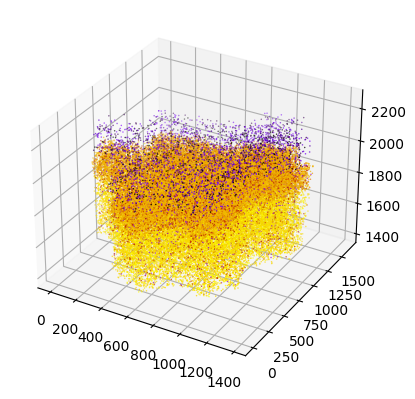

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(nodeprex_new,nodeprey_new,nodeprez_new, lw=0.05, s=1,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 20))

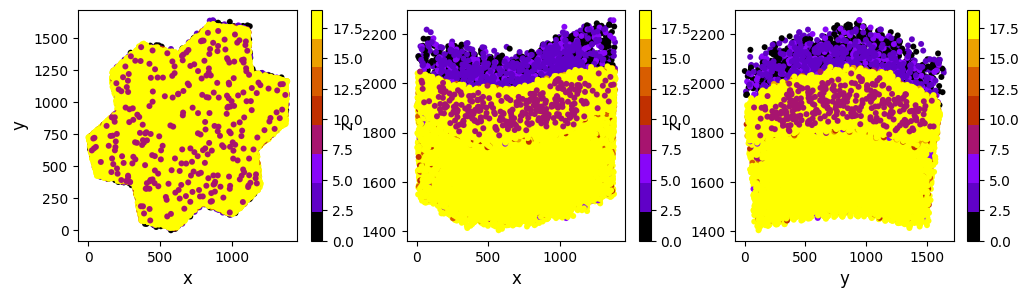

In [56]:
# plot the results
fig=plt.figure(figsize=(12,3))


plt.subplot(1,3,1)
plt.scatter(nodeprex_new,nodeprey_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.colorbar();

plt.subplot(1,3,2)
plt.scatter(nodeprex_new,nodeprez_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.colorbar();


plt.subplot(1,3,3)
plt.scatter(nodeprey_new,nodeprez_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.colorbar();

## Net info

In [57]:
print(list(circuit.nodes))
print(list(circuit.edges))

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']
['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [58]:
cells = circuit.nodes["S1nonbarrel_neurons"]
conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

proj_cells = circuit.nodes["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
proj_conn = circuit.edges["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
print(cells.size)
print(conn.size)
print(proj_cells.size)
# print(proj_conn.size)

211712
100
549126
